In [1]:
import halotools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname = 'bolplanck', version_name = 'halotools_v0p4',redshift = 0, \
                            halo_finder = 'rockstar')

In [3]:
from halotools.mock_observables import return_xyz_formatted_array

In [4]:
halopos = return_xyz_formatted_array(*(halocat.halo_table[ax][np.where(halocat.halo_table['halo_mvir']>4e14)]for ax in ('halo_x','halo_y','halo_z')))

In [5]:
ptclpos = return_xyz_formatted_array(*(halocat.ptcl_table[ax] for ax in 'xyz'))

In [6]:
def distance(r1,r2):
    dx = min(np.abs(r1[0]-r2[0]),500-np.abs(r1[0]-r2[0]))
    dy = min(np.abs(r1[1]-r2[1]),500-np.abs(r1[1]-r2[1]))
    dz = min(np.abs(r1[2]-r2[2]),500-np.abs(r1[2]-r2[2]))

    return np.sqrt(dx**2+dy**2+dz**2)

In [7]:
halopos.shape

(29, 3)

In [8]:
ptclpos.shape

(1000000, 3)

In [9]:
from halotools.utils import randomly_downsample_data

In [10]:
ptclpos = randomly_downsample_data(ptclpos, 1e5)

In [11]:
distances = np.zeros((halopos.shape[0],ptclpos.shape[0]))

In [12]:
for i in range(halopos.shape[0]):
    print i
    for j in range(ptclpos.shape[0]):
        distances[i,j] = distance(halopos[i],ptclpos[j])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [13]:
rbins = np.linspace(0,20,1001)
nptcls = np.histogram(distances,bins=rbins)
rho_ptcls = nptcls[0]/rbins[1:]**2

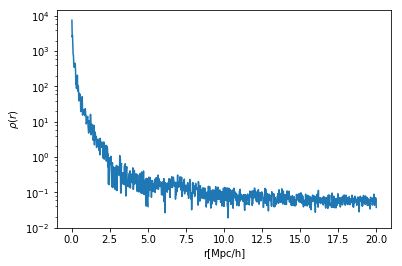

In [14]:
plt.plot(rbins[1:],rho_ptcls)
plt.semilogy()
plt.xlabel('r[Mpc/h]')
plt.ylabel(r'$\rho(r)$')